# Adsorption of Monomers and Polymers

Adsorption of Monomers:

## Adsorption of ideal gas

$\dfrac{N_{ads}}{N} = \dfrac{e^{\delta / k_B T}}{e^{\delta / k_B T} + V_0/V_{ads}}$

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import lattice_gas as laga
# important member functions: 
#   + someName.addMonomer(coordinates[np.array], attributes[dict])
#   + someName.plotConfig()
#   + someName.performMCS(time)
# important additional functions:
#   + calculateWallContacts(someName)
#
# or just use help(laga)

0.09375


<IPython.core.display.Javascript object>


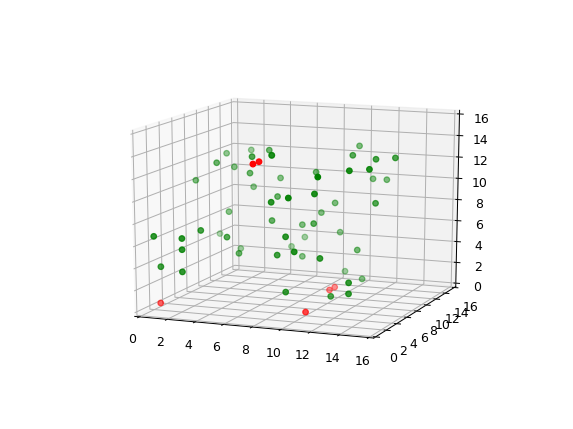

In [3]:
# try the laga module
box = [16,16,16]
periodic = [True, True, False]
numMonos = 64
delta = 8

testGas = laga.LatticeGasSimulator(box, periodic, delta)
for n in range(numMonos):
    newPos = random.randint(box-1,size=(3))
    testGas.addMonomer(newPos, {})

print(laga.calculateWallContacts(testGas))
testGas.plotConfig()

### perform the simulations:
* define variables
* loop over different deltas
* setup system and equilibrate, 
* sample mean number of adsorbed monomers (and maybe store results in file)
* plot results and compare with theory

Adsorption of Polymer

## Single chain in strong adsorption

Reduction of dimensionality by strong adsorption

In [2]:
import bfm_simulator as bfm
# important member functions: 
#   + someName.plotConfig()
#   + someName.performMCS(time, log = False, set True for more putput)
# important additional functions:
#   + setupLinearChains(chainlength, number of chains, box[array], periodicity[array], adsorption energy)
#   + calculateWallContacts(someName)
#   + calcRg2(someName) returns list of rg components for every molecule
#   + calculateDensityProfile(someName) returns np.array of size boxZ 
#
# or just use help(laga)

applied moves / attempted moves:
16095 / 64000 = 0.251484375


<IPython.core.display.Javascript object>


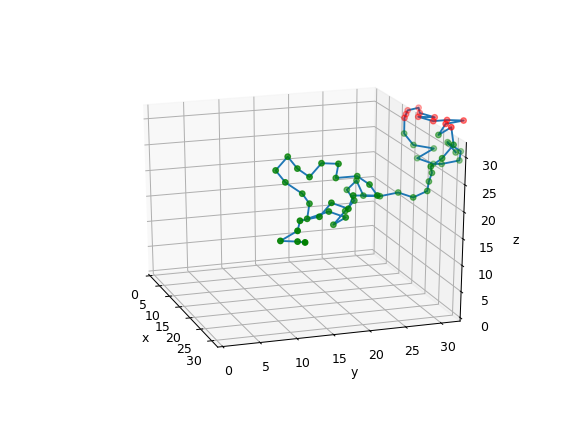

In [3]:
# try the bfm module

# parameters of the chain
chainlength_ = 64
numChains_ = 1
delta_ = 10.0

# parameters of the box
box = [32,32,32]
per = [True, True, False]

# create chain
singleChainSim = bfm.setupLinearChains(chainlength_, numChains_, box, per, delta_)
# equilibrate
singleChainSim.performMCS(1000,True)
#look at config
singleChainSim.plotConfig()

perform the simulations:
* define variables
* setup system
* equilibrate and check config to avoid chain split to both sides
* run the sampling of N_ads/N and Rg2
* plot the results

linear chain solution at adsorbing wall

## adsorption of polymer chain solution

### de Gennes self similar carpet

density profile along the z direction should decrease with a power law:

$\phi(z) \sim (z/b)^{-(3\nu -1)/\nu} \approx (z/b)^{-4/3}$

<IPython.core.display.Javascript object>


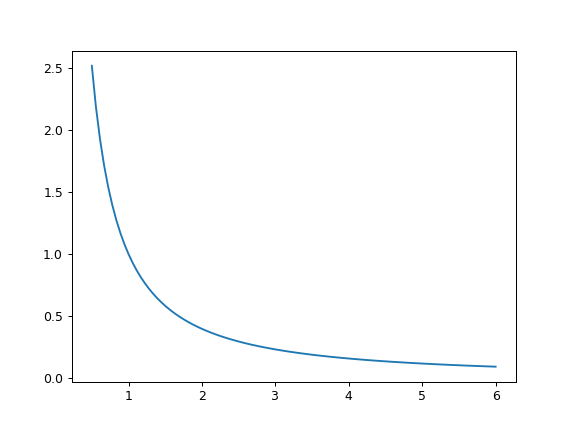

In [10]:
def deGennesCarpet(z,b,a):
    return (z/b)**a

figure()
plot(np.linspace(0.5,6,100),deGennesCarpet(np.linspace(0.5,6,100),1,-4/3))
show()